# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
d=pd.read_csv('Cancer.csv')
d.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
# 
d.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
d.shape

(699, 11)

In [6]:
d.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
d.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
d[d['Bare Nuclei']=='?'].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [9]:
d['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# d['Bare Nuclei']=d['Bare Nuclei'].replace('?',np.nan).astype(float)
# d['Bare Nuclei']=d['Bare Nuclei'].fillna((d['Bare Nuclei'].mode()))
d['Bare Nuclei'].replace('?','1',inplace=True)

In [11]:
d['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [12]:
d['Bare Nuclei']=d['Bare Nuclei'].astype('int64')
d.drop_duplicates(subset=None,inplace=True,keep='first')
d.shape[0]

690

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
d.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [14]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

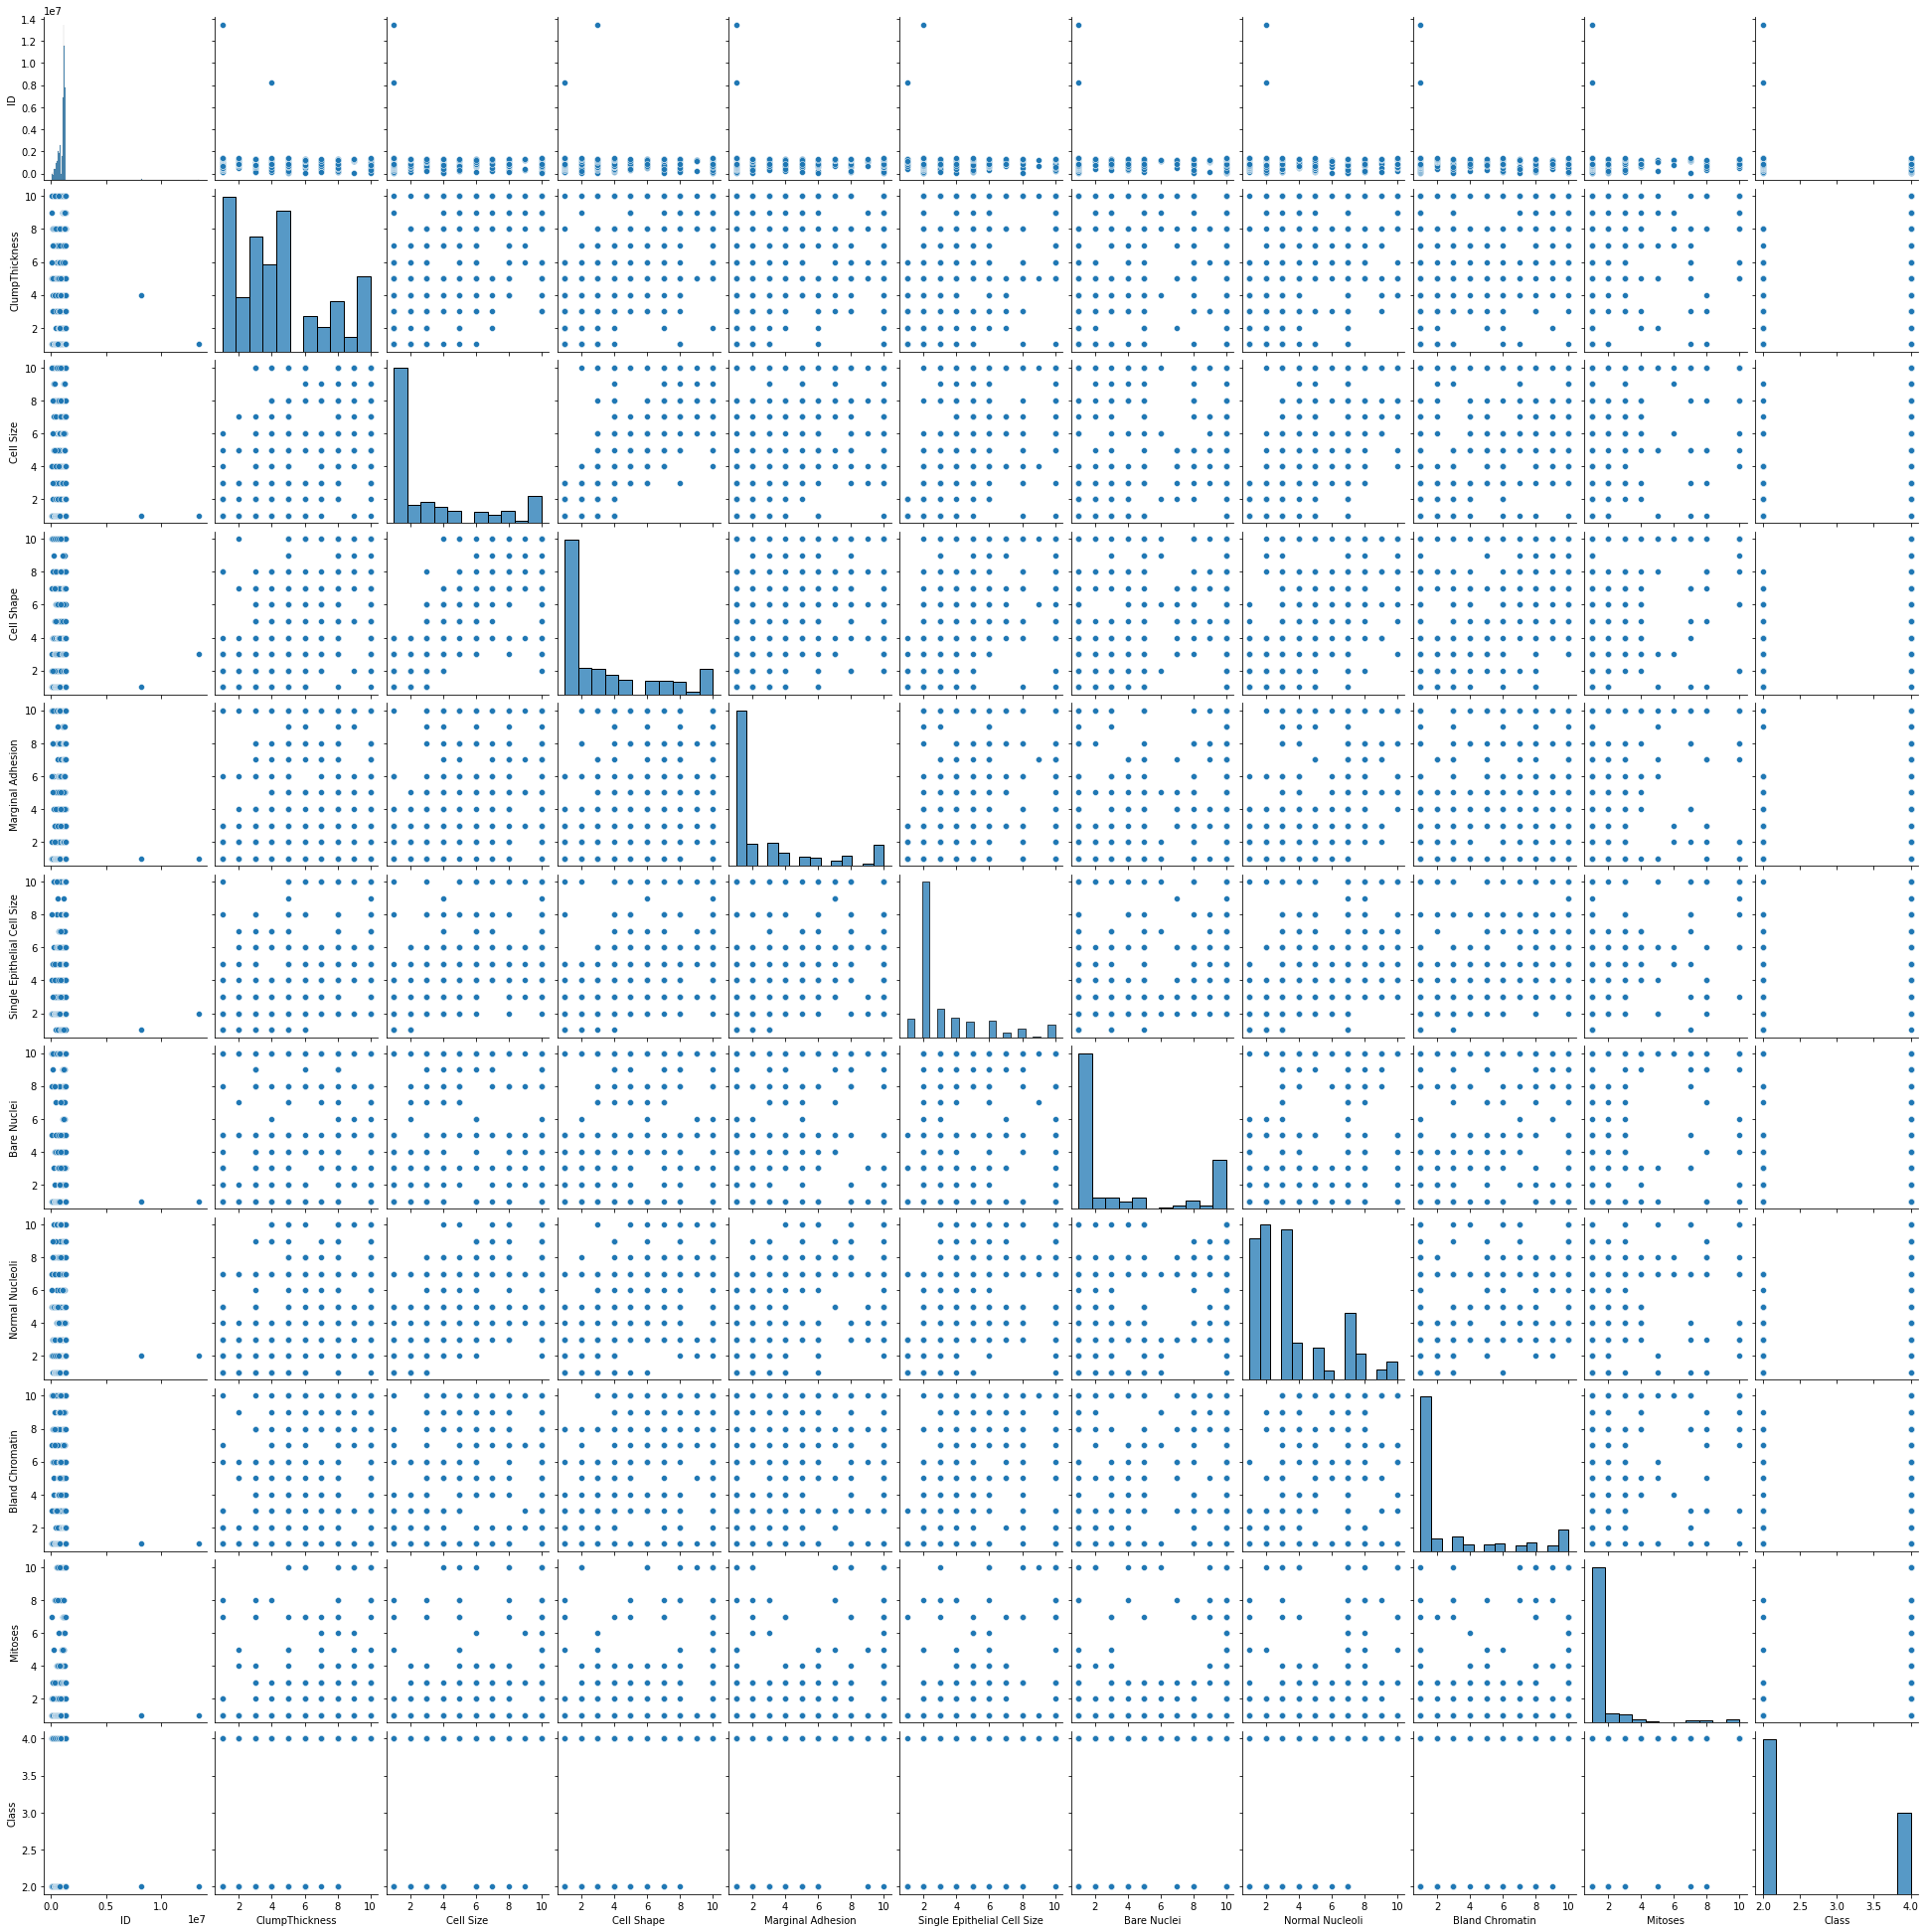

In [15]:
#Let us check the pair plot
sns.pairplot(d)

In [16]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [17]:
# We could see most of the outliers are now removed.

In [18]:
d.drop(columns='ID',axis=1,inplace=True)

<AxesSubplot:>

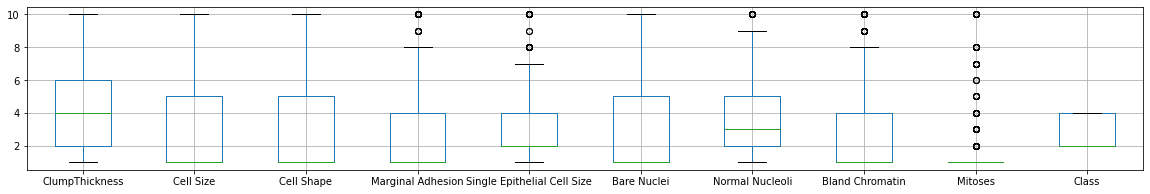

In [19]:
d.boxplot(figsize=(20,3))

In [20]:
pd.crosstab(d['Marginal Adhesion'],d['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [21]:
d['Marginal Adhesion']=np.where(d['Marginal Adhesion']>4,4,d['Marginal Adhesion'])
d['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [22]:
pd.crosstab(d['Single Epithelial Cell Size'],d['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [23]:
d['Single Epithelial Cell Size']=np.where(d['Single Epithelial Cell Size']>3,3,d['Single Epithelial Cell Size'])
d['Single Epithelial Cell Size'].value_counts()

2    382
3    263
1     45
Name: Single Epithelial Cell Size, dtype: int64

In [24]:
pd.crosstab(d['Normal Nucleoli'],d['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [25]:
d['Normal Nucleoli']=np.where(d['Normal Nucleoli']>4,4,d['Normal Nucleoli'])
d['Normal Nucleoli'].value_counts()

4    214
2    165
3    160
1    151
Name: Normal Nucleoli, dtype: int64

In [26]:
pd.crosstab(d['Bland Chromatin'],d['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [27]:
d['Bland Chromatin']=np.where(d['Bland Chromatin']>3,3,d['Bland Chromatin'])
d['Bland Chromatin'].value_counts()

1    436
3    218
2     36
Name: Bland Chromatin, dtype: int64

In [28]:
pd.crosstab(d['Mitoses'],d['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [29]:
d['Mitoses']=np.where(d['Mitoses']>2,2,d['Mitoses'])
d['Mitoses'].value_counts()

1    571
2    119
Name: Mitoses, dtype: int64

In [30]:
d.drop(columns='Class',axis=1,inplace=True)

In [31]:
from scipy.stats import zscore
d=d.apply(zscore)
d.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.536685,-0.686858,0.322808,-0.742837,-0.456515
1,0.202823,0.285065,0.268920,1.530101,1.161998,1.803153,0.322808,0.343090,-0.456515
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.536685,-0.410190,0.322808,-0.742837,-0.456515
3,0.558020,1.600748,1.620866,-0.781803,1.161998,0.143146,0.322808,1.429016,-0.456515
4,-0.152375,-0.701698,-0.745040,0.759466,-0.536685,-0.686858,0.322808,-0.742837,-0.456515


# Q6 Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix
d.cov()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.001451,0.644107,0.654538,0.553299,0.568761,0.591506,0.546691,0.576349,0.443431
Cell Size,0.644107,1.001451,0.906663,0.722050,0.694915,0.685565,0.669403,0.707144,0.492995
Cell Shape,0.654538,0.906663,1.001451,0.704257,0.681169,0.705187,0.658904,0.697593,0.464446
Marginal Adhesion,0.553299,0.722050,0.704257,1.001451,0.636180,0.696931,0.604275,0.635424,0.418267
Single Epithelial Cell Size,0.568761,0.694915,0.681169,0.636180,1.001451,0.634898,0.579387,0.652922,0.426823
Bare Nuclei,0.591506,0.685565,0.705187,0.696931,0.634898,1.001451,0.642378,0.630625,0.466161
Normal Nucleoli,0.546691,0.669403,0.658904,0.604275,0.579387,0.642378,1.001451,0.649474,0.377576
Bland Chromatin,0.576349,0.707144,0.697593,0.635424,0.652922,0.630625,0.649474,1.001451,0.490609
Mitoses,0.443431,0.492995,0.464446,0.418267,0.426823,0.466161,0.377576,0.490609,1.001451


# Q7 Identify eigen values and eigen vector

In [33]:
# Step 2- Get eigen values and eigen vector

In [34]:
eva,eve=np.linalg.eig(d.cov())

# Q8 Find variance and cumulative variance by each eigen vector

In [35]:
t=sum(eva)
v=[(i/t)*100 for i in sorted(eva,reverse=True)]
v

[65.74918765174188,
 7.73212698888361,
 5.273436941405615,
 4.820979409348615,
 4.506607905085305,
 4.231792457596733,
 3.5253984312163924,
 3.1448550596820177,
 1.015615155039834]

In [36]:
np.cumsum(v)

array([ 65.74918765,  73.48131464,  78.75475158,  83.57573099,
        88.0823389 ,  92.31413135,  95.83952979,  98.98438484,
       100.        ])

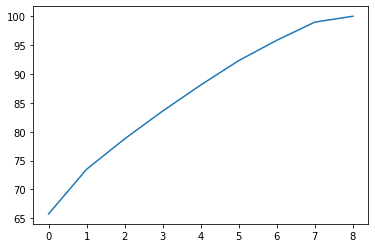

In [37]:
plt.plot(np.cumsum(v))

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [38]:
from sklearn.decomposition import PCA
p=PCA(n_components=9)
p.fit_transform(d).transpose()

array([[-1.4140469 ,  1.90057885, -1.54211882, ...,  3.7733269 ,
         2.6149369 ,  2.95923337],
       [-0.12094146, -1.02069985, -0.19415631, ...,  1.09716781,
        -1.32715094, -1.42799736],
       [-0.55018877,  0.57208643,  0.12050604, ...,  0.60535451,
         0.89342408,  0.86234269],
       ...,
       [ 0.30727445, -0.11048781,  0.45829639, ...,  0.50327371,
        -0.40600326, -0.24035838],
       [ 0.39486609, -0.23754871,  0.14007216, ...,  0.42164523,
         0.55106432,  0.25798139],
       [ 0.02517463,  0.06286948,  0.03142496, ..., -0.16496493,
         0.37220115, -0.07149611]])

# Q10 Find correlation between components and features

<AxesSubplot:>

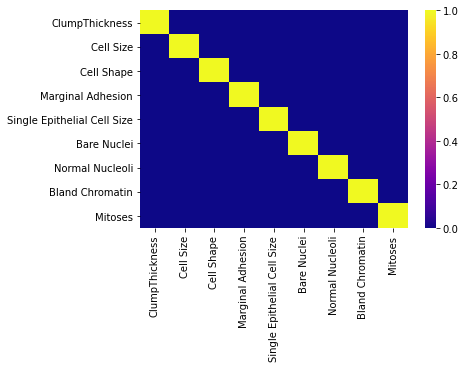

In [40]:
sns.heatmap(pd.DataFrame(p.fit_transform(d),columns=list(d)).corr(),cmap='plasma')